# Projeto Final

Análise de dados para um grupo de passageiros presentes no Titanic

# Pergunta Central

A pergunta que direcionou a análise ao longo desse projeto foi:




### Quais as principiais características que influenciaram a sobrevivência dos passageiros?

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline

df = pd.read_csv('titanic-data-6.csv')



##### Avaliação preliminar dos dados

In [101]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### Os dados dos passageiros somam 891 entradas de um total de 2241 tripulantes e passageiros presentes no cruzeiro. Para cada entrada/passageiro existem um conjunto de 12 características, descritas a seguir:
PassengerId = Número de identificação do passageiro
Pclass = Aproximação para status socioeconômico
Name = Nome do Passageiro
Sex = Gênero do Passageiro
Age = Idade do Passageiro
SibSp = Indica relações de irmão(a) e esposo(a) entre os passageiros. Esse valor representa o número de relações por passageiro.
Parch = Indica relações de pai/mãe e filho(a) entre os passageiros. Esse valor representa o número de relações por passageiro.
Ticket = Número do Ticket do passageiro
Fare = Tarifa do passageiro
Cabin = Cabine do passageiro
Embarked = Local do embarque do passageiro





Agora que já é possível se ter uma noção geral dos dados, vamos nos concentrar em investigar as características dos sobreviventes e para isso primeiro foi necessário filtrar os passageiros sobreviventes.


In [103]:
#filtrando os dados dos sobreviventes
df_surv = df[df['Survived']==1] 
df_surv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    342 non-null int64
Survived       342 non-null int64
Pclass         342 non-null int64
Name           342 non-null object
Sex            342 non-null object
Age            290 non-null float64
SibSp          342 non-null int64
Parch          342 non-null int64
Ticket         342 non-null object
Fare           342 non-null float64
Cabin          136 non-null object
Embarked       340 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 34.7+ KB


In [104]:
#Filtrando uma série contendo o número de não sobreviventes e sobreviventes.

count_surv=df.groupby(['Survived'])['PassengerId'].describe()['count']

In [105]:
#Cálculo da proporção de sobrevivência geral do passsageiros como o limite (thereshold),
#Podendo ser calculada pelo quociente entre o número de sobreviventes e o total de passageiros da amostra.
threshold = count_surv[1]/(count_surv[0]+count_surv[1])

### O indicador socioeconômico afetou de alguma maneira a sobrevivência dos passageiros?


In [106]:
#Primeiro: foi necessário calcular o número de passageiros por classe socioeconômica.
class_count=df.groupby('Pclass')['PassengerId'].agg('count')

fir_class = class_count[1]
sec_class = class_count[2]
thi_class = class_count[3]

In [107]:
#Segundo: O número de passageiros sobreviventes por classe
df_class = df.groupby(['Pclass'])['Survived'].sum()

fir_class_surv = df_class[1]
sec_class_surv = df_class[2]
thi_class_surv = df_class[3]

In [108]:
def hist_for_class(heights):
    locations = [1, 2, 3]
    labels = ['1st', '2nd', '3rd']
    fig = plt.bar(locations, heights, tick_label=labels)
    return fig

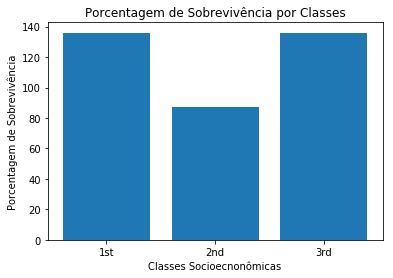

In [109]:
#Criando um histograma distribuição da taxa de sobrevivência por classe socioeconômica.
#Esse gráfico possibilita a avaliação dos indices de sobrevivência por classe socioeconômica.

locations = [1, 2, 3]
hist_for_class(heights);
plt.title('Porcentagem de Sobrevivência por Classes')
plt.xlabel('Classes Socioecnonômicas')
plt.ylabel('Porcentagem de Sobrevivência');


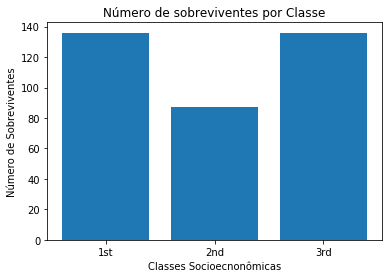

In [110]:
#A porcentagem de sobrevivência por classe tam

#Criando um histograma distribuição da taxa de sobrevivência por classe socioeconômica.

heights = [fir_class_surv, sec_class_surv, fir_class_surv]
hist_for_class(heights);

plt.title('Número de sobreviventes por Classe')
plt.xlabel('Classes Socioecnonômicas')
plt.ylabel('Número de Sobreviventes');

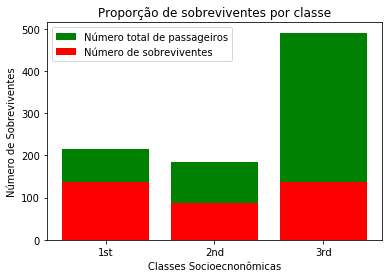

In [111]:
#Criando um histograma distribuição da taxa de sobrevivência por classe socioeconômica.
locations = [1, 2, 3]
heights = np.array([fir_class_surv, sec_class_surv, fir_class_surv])
labels = ['1st', '2nd', '3rd']
heights2 = np.array([fir_class,sec_class,thi_class])

p1=plt.bar(locations,heights2, tick_label=labels, color='g',)
p2=plt.bar(locations, heights, tick_label=labels, color='r',)

plt.title('Proporção de sobreviventes por classe')
plt.xlabel('Classes Socioecnonômicas')
plt.ylabel('Número de Sobreviventes')
plt.legend((p1,p2),('Número total de passageiros','Número de sobreviventes'));


É possível notar que a sobrevivência se deu de diferentes maneiras em cada uma das classes.

### O Gênero afetou de alguma maneira a sobrevivência dos passageiros?


In [112]:
#Investigando o total de homens e mulheres da amostra.
df_sex=df.groupby('Sex')['Survived'].agg('count')

#Deefinindo o total de mulheres e homens.
total_F = df.groupby('Sex')['Survived'].agg('count')['female']
total_M = df.groupby('Sex')['Survived'].agg('count')['male']
total = df_sex['female']+df_sex['male']

In [113]:
#Contando o número de soobreviventes por gênero
surv_sex=df[df['Survived']==1].groupby('Sex')['Survived'].sum()

#Definindo o total de sobreviventes por gênero
surv_F = surv_sex['female']
surv_M = surv_sex['male']
surv_total = surv_M + surv_F

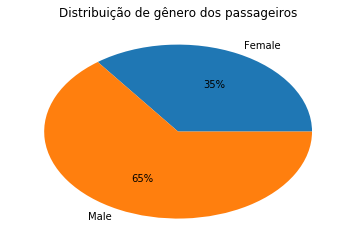

In [114]:
#Criando um gráfico de pizza
proporcoes = [total_F/total , total_M/total]
labels = ['Female', 'Male']
plt.pie(proporcoes, labels=labels, autopct='%.0f%%')
plt.title('Distribuição de gênero dos passageiros');

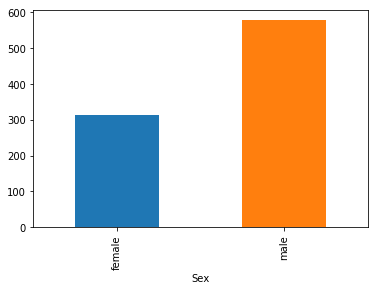

In [115]:
df.groupby('Sex')['PassengerId'].agg('count').plot(kind='bar');

Primeiro ponto a se observar sobre os generos na amostra é que o gênero masculino é 2x mais frequente que o feminino

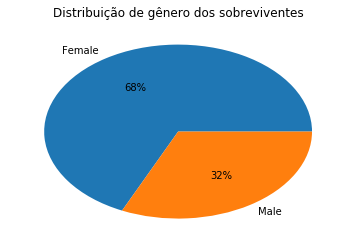

In [116]:
#Construindo um grafico da de pizza com os valores absolutos expressos no gráfico
proporcoes = [surv_F/surv_total, surv_M/surv_total]
labels = ['Female', 'Male']
plt.pie(proporcoes, labels=labels, autopct='%.0f%%')
plt.title('Distribuição de gênero dos sobreviventes');

No entanto ao se tratar dos sobreviventes a proporção entre gêneros se inverte.

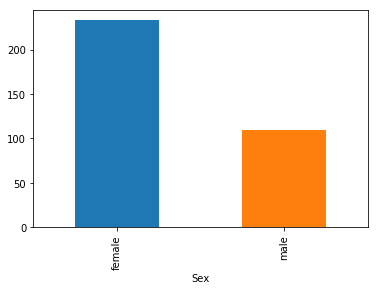

In [117]:
df[df['Survived']==1].groupby('Sex')['Survived'].sum().plot(kind='bar');

Apesar dos homens serem em número 2 vezes maior que as mulheres, cerca de 2 vezes mais mulheres se salvaram quando comparadas aos homens. Os valores relativos são apresentados a seguir:

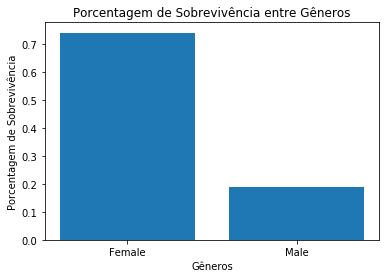

In [118]:
#Criando um histograma
locations = [1, 2]
heights = [surv_F/total_F, surv_M/total_M]
labels = ['Female', 'Male']
plt.bar(locations, heights, tick_label=labels)
plt.title('Porcentagem de Sobrevivência entre Gêneros')
plt.xlabel('Gêneros')
plt.ylabel('Porcentagem de Sobrevivência');


### De que maneira essa relação de genero se relaciona com as classes socioeconomias e a sobrevivência?

In [119]:
#agrupando dados por genero e classe social

df_sex_pclass = df.groupby(['Pclass','Sex'])['Survived'].sum()
df_sex_pclass

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

In [120]:
#Gráfico de barras contendo o número total de passageiros por classe e o número de passageiros sobreviventes por gênero.
locations = [1, 2, 3]
heights = np.array([fir_class,sec_class,thi_class])
labels = ['1st', '2nd', '3rd']
heights2 = np.array([surv_mas_1,surv_mas_2,surv_mas_3])
heights3 = np.array([surv_fem_1,surv_fem_2,surv_fem_3])


p1=plt.bar(locations,heights, tick_label=labels, color='g',bottom=0)
p3=plt.bar(locations,heights3, tick_label=labels, color='b',bottom=heights2)
p2=plt.bar(locations, heights2, tick_label=labels, color='r',bottom=0)

plt.title('Proporção de sobreviventes por classe')
plt.xlabel('Classes Socioecnonômicas')
plt.ylabel('Número de Sobreviventes')
plt.legend((p1,p2,p3),('Número total de passageiros','Número de sobreviventes homens','Número de sobreviventes mulheres'));

NameError: name 'surv_mas_1' is not defined

Ao se comparar a sobrevivência entre gêneros fica claro a predileção à sobrevivência do gênero feminino.


# Conclusões

De acordo com as análises propostas foi possível concluir que as características de gênero e classe socioeconômica são as mais influentes, isto é, mais correlacionadas a sobrevivência dentre as demais.

No entanto, percebe-se claramente que e as classes economicas tiveram impactos diferentes sobre a sobrevivencia dos passageiros. Pode se notar também que a 3ª classe foi a drasticamente prejudicada. 
Nos gráficos a seguir são comparados em números relativos aos sobreviventes nas diferentes classes socioeconômicas e posteriormente, esses mesmos dados são exibidos em conjunto com total de passageiros por classe separados por gênero.


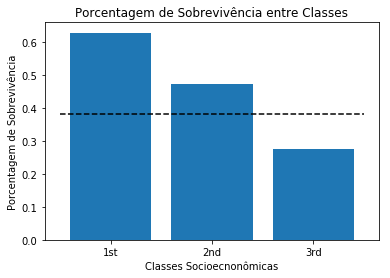

In [121]:
#Incluindo uma reta com a proporção de sobreviventes
locations = [1, 2, 3]
heights = [fir_class_surv/fir_class, sec_class_surv/sec_class, fir_class_surv/thi_class]
labels = ['1st', '2nd', '3rd']

fig, ax= plt.subplots()
ax.bar(locations, heights, tick_label=labels)
ax.set_title('Porcentagem de Sobrevivência entre Classes')
ax.plot([0.5, 3.5], [threshold, threshold], "k--");
plt.xlabel('Classes Socioecnonômicas')
plt.ylabel('Porcentagem de Sobrevivência');


In [122]:
#Filtrando dados por classe socioeconômica e depois por sexo

df_class1=df[df['Pclass']==1].groupby('Sex').agg('count')['PassengerId']
df_class2=df[df['Pclass']==2].groupby('Sex').agg('count')['PassengerId']
df_class3=df[df['Pclass']==3].groupby('Sex').agg('count')['PassengerId']

In [123]:
#filtrando os dados dos sobreviventes por sexo
df_surv_male = df[df['Sex']=='male']
df_surv_male = df_surv_male[df_surv_male['Survived']==1]

df_surv_female = df[df['Sex']=='female']
df_surv_female = df_surv_female[df_surv_female['Survived']==1]

#Contando o número de sobreviventes por sexo e por classe socioeconômica
df_surv_male=df_surv_male.groupby('Pclass').agg('count')['PassengerId']
df_surv_female=df_surv_female.groupby('Pclass').agg('count')['PassengerId']


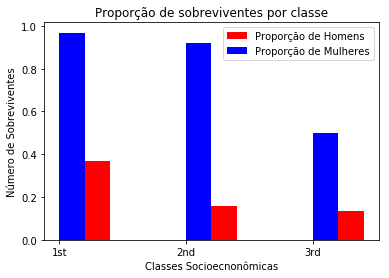

In [124]:
#Incluindo uma reta com a proporção de sobreviventes
locations = [1, 2, 3]
locations2 = [0.8, 1.8, 2.8]
labels = ['1st', '2nd', '3rd']
heights_male = np.array([df_class1['male'],df_class2['male'],df_class3['male']])
heights_female = np.array([df_class1['female'],df_class2['female'],df_class3['female']])
labels = ['1st', '2nd', '3rd']


ax = plt.subplot()
p1=ax.bar(locations, df_surv_male/heights_male, width=0.2,color='r', align='edge', tick_label=labels)
p2=ax.bar(locations2, df_surv_female/heights_female, width=0.2,color='b', align='edge', tick_label=labels)


plt.title('Proporção de sobreviventes por classe')
plt.xlabel('Classes Socioecnonômicas')
plt.ylabel('Número de Sobreviventes')
plt.legend((p1,p2),('Proporção de Homens','Proporção de Mulheres'));

No último gráfico, é possível visualizar as diferentes influências das classes socioeconômicas sobre a sobrevivência dos gêneros. Nele também é possível visualizar que o impacto na sobrevivência é diverso a depender da classe socioeconômica.
Como ficou claro ao longo das análises as classes mais abastadas têm tendência maior a sobrevivência que as classes menores, no entanto essa sobrevivência é dada de diferentes formas para cada gênero ao longo das classes.
Os gráficos a seguir ajudam a ilustrar essa diferença quando comparados as proporções de sobrevivência por gênero en cada uma das classes.


## Limitações
É necessário relembrar que os dados da amostra se referem a 891 passageiros, de um total de 2224 passageiros. Isto significa uma parte(amostra) do todo(população) portanto os valores calculados são estimativas, valores esperados e não necessariamente descrevem a realidade de uma população, visto que sua concepção foi feita por meio de apenas uma parte do todo.

Outras limitações podem ser levantas em função da falta de informação para alguns usuários nos quesitos idade (Age), embarque(Embarke) e cabine(Cabin).

Uma característica que teve sua exploração limitada foi o valor das tarifas pagas pelos passgeiros da amostra. De acordo com os valores apresentados nos dado, as tarifas apresentam dados incorretos e por conta da incapacidade de interepretá-los com certeza, teve sua insvestigação comprometida.

# Apêndice
Apesar das características socioeconômicas e de gênero possuirem um relação mais forte com a sobrevivência. Outras variáveis foram investigadas, e essas consultas são apresentadas a seguir.

# Dados faltantes

É possível se observar que existem valores faltando nas colunas Age, Cabin e Embarked.


### Vamos começar pela coluna Age
Questão 1

Os dados faltantes possuem alguma coisa em comum?

In [125]:
#Calculando o número de valores faltando
pd.isna(df['Age'])

0      False
1      False
2      False
3      False
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26      True
27     False
28      True
29      True
       ...  
861    False
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878     True
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [126]:
#Investigando as linhas com valores faltantes
#Seleção dos termos que possíam valores faltando na coluna Age
df[df.iloc[:,0:-4].isnull().any(axis=1)].groupby('Survived').agg('count')['PassengerId']

Survived
0    125
1     52
Name: PassengerId, dtype: int64

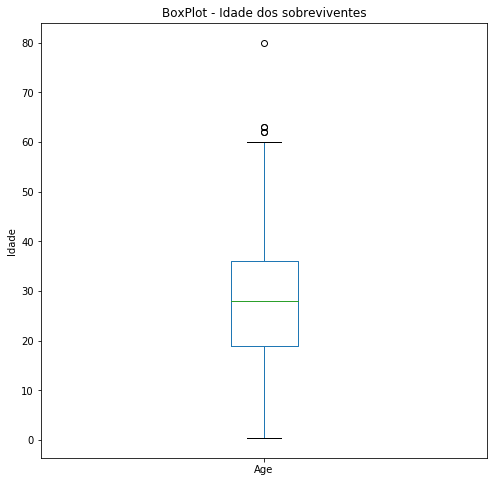

In [127]:
#Nomear os eixos
df_surv['Age'].dropna().plot(kind='box', figsize=(8,8))

plt.title('BoxPlot - Idade dos sobreviventes')
plt.xlabel('')
plt.ylabel('Idade');

É possível observar por meio do gráfico acima que mais 75% dos sobreviventes estão abaixo dos 40 anos.
Nata-se também 3 outliners acima da marca dos 60 anos, se retirados dos dados plotados temos o gráfico a seguir

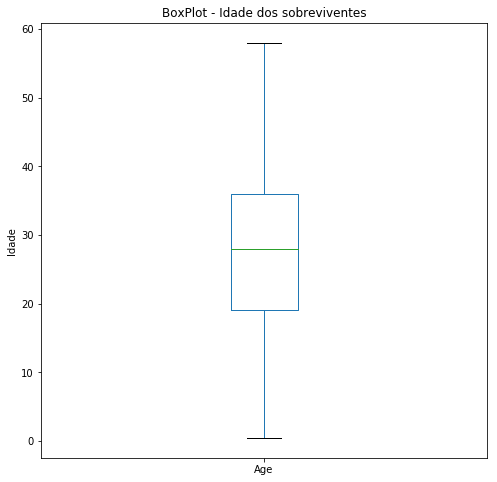

In [128]:
df_surv[df_surv['Age']<60]['Age'].dropna().plot(kind='box', figsize=(8,8))
plt.title('BoxPlot - Idade dos sobreviventes')
plt.xlabel('')
plt.ylabel('Idade');

Com a retirada dos outliners o boxplot parece assumir um formato mais central e simétrico. O que me fez investigar a distribuição dos dados, por meio do gráfico a seguir:

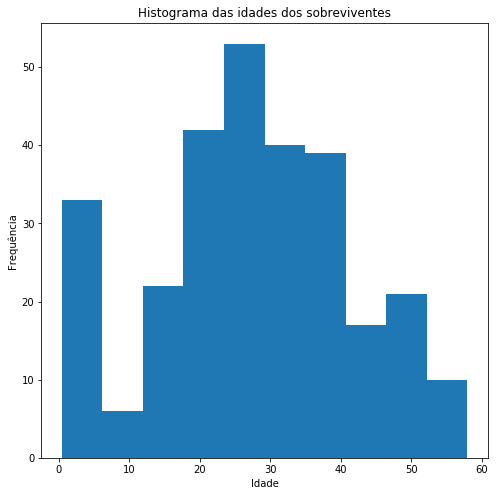

In [129]:
df_surv[df_surv['Age']<60]['Age'].dropna().plot(kind='hist', figsize=(8,8))
plt.title('Histograma das idades dos sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Frequência');

Ao se analisar o histograma, podemos perceber um formato tendendo a uma distribuição normal excluindo-se apenas as idades iniciais por distorcerem a forma da distribuição.
Por essa tendência de distribuição normal não foi possível relacionar a idade a sobrevivência dos passageiros de forma direta. Apesar de ser notável uma maior tendência dos mais novos a sobrevivência.

### Explorando dados de local de embarque dos passageiro

In [130]:
#CAlculando a proporção de sobrevivência por ponto de embarque.
df[df['Survived']==1].groupby('Embarked').agg('count')['PassengerId']/df.groupby('Embarked').agg('count')['PassengerId']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: PassengerId, dtype: float64

Os passageiros de Cherbourg, tiveram uma taxa de sobrevivência um pouco mais elevada que os demais pontos de embarque
Vamos nos aprofundar na exploração dos passageiros que embarcaram em Cherbourg


In [131]:
#Contagem do número de passageiros embarcados em Cherbourg separados por classe socioeconômica.
df[df['Embarked']=='C'].groupby(['Pclass'])['PassengerId'].agg('count')

Pclass
1    85
2    17
3    66
Name: PassengerId, dtype: int64

In [132]:
#Filtragem e posterior investigação visual dos dados de 1 e 2 classe dos que embarcaram em Cherbourg.
df_C = df[df['Embarked']=='C']
df_C12 = df_C[df_C['Pclass']<3]
df_C12[df_C12['Survived']==0].sort_values(by=['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C
373,374,0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,NaN,C
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
583,584,0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C


In [133]:
df_C12[df_C12['Survived']==1].sort_values(by=['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
389,390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,SC 1748,12.0000,NaN,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.4000,NaN,C


In [134]:
#Contagem dos Passageiros embarcados em Queenstown separados por classe socioeconômica.
df[df['Embarked']=='Q'].groupby(['Pclass'])['PassengerId'].agg('count')

Pclass
1     2
2     3
3    72
Name: PassengerId, dtype: int64

In [135]:
#Filtragem e posterior investigação visual dos dados de 1 e 2 classe dos que embarcaram em Queenstown.
df_Q=df[df['Embarked']=='Q']
df_Q12=df_Q[df_Q['Pclass']<3]
df_Q[df_Q['Survived']==0].sort_values(by=['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
749,750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q


In [136]:
#Contagem dos Passageiros embarcados em Queenstown separados por classe socioeconômica.
df_Q[df_Q['Survived']==1].sort_values(by=['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
653,654,1,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,330980,7.8792,NaN,Q
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q


In [137]:
#Contagem dos Passageiros embarcados em Southampton separados por classe socioeconômica.
df[df['Embarked']=='S'].groupby(['Pclass'])['PassengerId'].agg('count')

Pclass
1    127
2    164
3    353
Name: PassengerId, dtype: int64

In [138]:
#Contagem dos Passageiros embarcados em Southamptonn separados por classe socioeconômica.

df_S = df[df['Embarked']=='S']
df_S[df_S['Survived']==1].sort_values(by=['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S


O fato dos passageiros de Cherbourgh terem uma taxa de sobrevivência maior que os demais locais também é um indicador da influência da classe socioeconômica na sobrevivência dos passageiros, visto que a maior parte dos embarcados em Cherbourgh ficaram na 1ª classe.

### Agora vamos investigar as relações de parentesco...

Será que crianças acompanhadas dos pais tiveram uma taxa de sobre vivência maior que crianças desacompanhadas ou com babás?


In [139]:
#Para essa investigação foi considerado crianças, pessoas com idade inferior a 13 anos e idosos, pessoas com mais de 65 anos.
df_kids=df[df['Age']<13]
df_kids.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 7 to 869
Data columns (total 12 columns):
PassengerId    69 non-null int64
Survived       69 non-null int64
Pclass         69 non-null int64
Name           69 non-null object
Sex            69 non-null object
Age            69 non-null float64
SibSp          69 non-null int64
Parch          69 non-null int64
Ticket         69 non-null object
Fare           69 non-null float64
Cabin          11 non-null object
Embarked       69 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 7.0+ KB


In [140]:
#Separando as crianças entre as que estavam desacompanhadas e as acompanhadas.
df_NParch = df_kids[df_kids['Parch']==0]
df_Parch = df_kids[df_kids['Parch']!=0]

In [141]:
df_NParch


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S


In [142]:
df_NParch[df_NParch['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S


In [143]:
df_Parch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 7 to 869
Data columns (total 12 columns):
PassengerId    66 non-null int64
Survived       66 non-null int64
Pclass         66 non-null int64
Name           66 non-null object
Sex            66 non-null object
Age            66 non-null float64
SibSp          66 non-null int64
Parch          66 non-null int64
Ticket         66 non-null object
Fare           66 non-null float64
Cabin          11 non-null object
Embarked       66 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 6.7+ KB


In [144]:
df_Parch[df_Parch['Survived']==1].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 10 to 869
Data columns (total 12 columns):
PassengerId    38 non-null int64
Survived       38 non-null int64
Pclass         38 non-null int64
Name           38 non-null object
Sex            38 non-null object
Age            38 non-null float64
SibSp          38 non-null int64
Parch          38 non-null int64
Ticket         38 non-null object
Fare           38 non-null float64
Cabin          9 non-null object
Embarked       38 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 3.9+ KB


##### Apesar da proporção de crianças sobreviventes ser maior para as desacompanhas ou com babás, o baixo número de amostra com essas características não permitem dizer de maneira conclusiva que as crianças desacompanhadas teriam uma correlação maior com a sobrevivência.

In [145]:
#Número de crianças por classe sociaeconomica e Número de crianças por classe sociaeconomica sobreviventes
print(df_kids.groupby('Pclass').agg('count')['PassengerId'],
df_kids[df_kids['Survived']==1].groupby('Pclass').agg('count')['PassengerId'])

Pclass
1     4
2    17
3    48
Name: PassengerId, dtype: int64 Pclass
1     3
2    17
3    20
Name: PassengerId, dtype: int64


In [146]:
#Única criança de alta classe socioeconômica a não sobreviver ao acidente
df_kids_not_surv = df_kids[df_kids['Survived']==0]
df_kids_not_surv[df_kids_not_surv['Pclass']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S


In [147]:
df_kids[df_kids['Pclass']==2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.0000,F2,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.00,0,2,C.A. 31921,26.2500,NaN,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.0000,F2,S
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,NaN,S
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.00,0,2,F.C.C. 13529,26.2500,NaN,S


In [148]:
df_kids[df_kids['Parch']==0]
#Apenas 3 crianças estavam com babás das quais 2 sobreviveram

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.4750,NaN,S


In [149]:
df_kids_3=df_kids[df_kids['Pclass']==3]
df_kids_3[df_kids_3['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,315153,22.0250,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,347077,31.3875,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.00,4,2,347077,31.3875,NaN,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C


In [150]:
#Proporção de crianças sobreviventes por classe socioeconomica
df_kids[df_kids['Survived']==1].groupby('Pclass').agg('count')['PassengerId']/df_kids.groupby('Pclass').agg('count')['PassengerId']

Pclass
1    0.750000
2    1.000000
3    0.416667
Name: PassengerId, dtype: float64

In [151]:
df_kids.count()['PassengerId']

69

In [152]:
df_kids[df_kids['Survived']==1].count()['PassengerId']

40

In [153]:
df_kids[df_kids['Survived']==1].count()['PassengerId']/df_kids.count()['PassengerId']

0.5797101449275363

#####  Se compararmos as proporções de sobrevivência das crianças por classe e no geral, vemos que são maiores que as proporções de sobrevivência dos adultos em geral.
Isso indica um forte preferencia por salvar crianças muitas vezez em detrimento do Pai.

In [154]:
df_adult1 = df[df['Age']>17]
df_adult2 = df[df['Age']<64]
df_adult = pd.merge(df_adult1, df_adult2, how='inner').sort_values(by=['Age'])
df_man = df_adult[df_adult['Sex']=='male']
df_man_n_wife = df_man[df_man['SibSp'] == 0]
df_man_pista = df_man_n_wife[df_man_n_wife['Parch']==0]

In [155]:
#Vamos falar sobre idosos???
df_elder = df[df['Age']>64]
df_elder.info()
df_elder[df_elder['Survived']==1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 33 to 851
Data columns (total 12 columns):
PassengerId    11 non-null int64
Survived       11 non-null int64
Pclass         11 non-null int64
Name           11 non-null object
Sex            11 non-null object
Age            11 non-null float64
SibSp          11 non-null int64
Parch          11 non-null int64
Ticket         11 non-null object
Fare           11 non-null float64
Cabin          5 non-null object
Embarked       11 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S
